# Basic text mining, document classification, and sentiment analysis
(by Tevfik Aytekin)

In [37]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor


# You need to call nltk.download() to download all the nltk corpora

In [38]:
nltk.download('gutenberg')

gutenberg.fileids()

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [39]:
print(gutenberg.raw('austen-emma.txt'))

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [40]:
print("num_chars: ", len(gutenberg.raw('austen-emma.txt')))
print("num_words: ", len(gutenberg.words('austen-emma.txt')))
print("num_sents: ", len(gutenberg.sents('austen-emma.txt')))

num_chars:  887071
num_words:  192427
num_sents:  7717


### Frequency Distribution

In [41]:
words = gutenberg.words('austen-emma.txt')
dist = FreqDist(words)

In [42]:
dist

FreqDist({',': 11454, '.': 6928, 'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, ...})

In [43]:
freqwords = [w for w in dist.keys() if len(w) > 5 and dist[w] > 50]
freqwords[:5]

['CHAPTER', 'Woodhouse', 'seemed', 'little', 'father']

### Stemming

The stemming process is defined in the [Porter stemmer web page](https://tartarus.org/martin/PorterStemmer/) as follows:

The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [44]:
text1 = "consulting consultant consultants consultings"
words1 = text1.lower().split(' ')
words1

['consulting', 'consultant', 'consultants', 'consultings']

In [45]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['consult', 'consult', 'consult', 'consult']

In [46]:
text2 = "universal University universe"
words2 = text2.lower().split(' ')
[porter.stem(t) for t in words2]

['univers', 'univers', 'univers']

Note that the stemming process not always returns a whole meaningful word. This is because the aim of stemming is to increase the effectiveness of an information retrieval system and the success of a stemmer should be evaluated with respect to the effectiveness of the IR systems. If you want to get meaningful words then you should use lemmatization.

### Lemmatization

In [47]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
wn_lemma = nltk.WordNetLemmatizer()
text = "plays caring bats"
words = text.lower().split(' ')
[wn_lemma.lemmatize(t) for t in words]

['play', 'caring', 'bat']

In [49]:
text2 = "plays caring bats"
words2 = text2.lower().split(' ')
[porter.stem(t) for t in words2]

['play', 'care', 'bat']

In [50]:
wn_lemma.lemmatize('caring','v')

'care'

### Part-of-speech (POS) Tagging

In [51]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [52]:
text = "Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence"
print(text)
words = nltk.word_tokenize(text)
nltk.pos_tag(words)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence


[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN')]

## Document Classification

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
from nltk.corpus import stopwords, reuters
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
stop_words = stopwords.words("english")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [56]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../../datasets/bbc-text.csv")
# you can download the dataset from here: https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [57]:
data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [58]:
data.shape

(2225, 2)

In [59]:
import textwrap
print(textwrap.fill(data.iloc[0,1], 50))

tv future in the hands of viewers with home
theatre systems  plasma high-definition tvs  and
digital video recorders moving into the living
room  the way people watch tv will be radically
different in five years  time.  that is according
to an expert panel which gathered at the annual
consumer electronics show in las vegas to discuss
how these new technologies will impact one of our
favourite pastimes. with the us leading the trend
programmes and other content will be delivered to
viewers via home networks  through cable
satellite  telecoms companies  and broadband
service providers to front rooms and portable
devices.  one of the most talked-about
technologies of ces has been digital and personal
video recorders (dvr and pvr). these set-top boxes
like the us s tivo and the uk s sky+ system  allow
people to record  store  play  pause and forward
wind tv programmes when they want.  essentially
the technology allows for much more personalised
tv. they are also being built-in to high-
def

In [60]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Vector space model

#### CountVectorizer


In [27]:
import numpy as np

In [61]:
vectorizer = CountVectorizer(analyzer = "word", max_features = 10, max_df=0.1)
count_model = vectorizer.fit(data["text"])
X = count_model.transform(data["text"])

In [62]:
pd.DataFrame(data=X.todense(), columns=count_model.get_feature_names_out())

,blair,brown,economy,election,mobile,net,sales,services,tax,tv
0,0,0,0,0,1,0,0,1,0,13
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,15,0,0,0
2221,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0
2223,3,3,0,0,0,0,0,0,0,0


#### TfidfVectorizer
[more info](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

### TF-IDF (Term Frequency-Inverse Document Frequency) in NLP

**TF-IDF** is a technique used in Natural Language Processing (NLP) to evaluate the importance of a word in a document relative to a collection of documents (corpus). It combines two main metrics:

### 1. Term Frequency (TF)
Term Frequency measures how frequently a word appears in a document. Words that appear more frequently in a document get a higher score, as they are likely more relevant to the document's content.

The formula for TF is:

$$
\text{TF} = \frac{\text{Number of times a term appears in a document}}{\text{Total number of terms in the document}}
$$

### 2. Inverse Document Frequency (IDF)
Inverse Document Frequency measures how unique or rare a word is across multiple documents. Words that appear in many documents, like "the" or "is," are considered less informative and thus get a lower weight.

The formula for IDF is:

$$
\text{IDF} = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing the term}}\right)
$$

### TF-IDF Score
By combining **TF** and **IDF**, TF-IDF highlights words that are frequent in a document but rare across the corpus. The TF-IDF score for a term in a document is calculated by multiplying TF and IDF:

$$
\text{TF-IDF} = \text{TF} \times \text{IDF}
$$

### Purpose of TF-IDF in NLP
TF-IDF is used in text processing tasks such as:
- **Document similarity**: Identifying similar documents based on word importance.
- **Information retrieval**: Improving search engine relevance by ranking results with significant terms.
- **Keyword extraction**: Extracting meaningful keywords from text by identifying unique and frequent terms.

By weighting words based on their importance, TF-IDF helps highlight the most relevant words for tasks like categorization, classification, and summarization.


In [70]:
vectorizer = TfidfVectorizer(analyzer = "word", max_features = 20, max_df=0.3)
tfidf_model = vectorizer.fit(data["text"])
X = tfidf_model.transform(data["text"])

In [71]:
pd.DataFrame(data=X.todense(), columns=tfidf_model.get_feature_names_out())

,against,being,best,do,film,game,get,government,just,like,made,make,only,she,such,them,told,uk,what,you
0,0.000000,0.375197,0.00000,0.097177,0.000000,0.000000,0.000000,0.0,0.096548,0.202939,0.000000,0.000000,0.092521,0.0,0.099194,0.482742,0.095657,0.304175,0.659792,0.104123
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.620915,0.627402,0.000000,0.0,0.000000,0.000000,0.317921,0.000000,0.000000,0.346059
2,0.000000,0.338158,0.00000,0.000000,0.000000,0.436069,0.000000,0.0,0.000000,0.000000,0.336761,0.680558,0.000000,0.0,0.000000,0.000000,0.344856,0.000000,0.000000,0.000000
3,0.931004,0.000000,0.00000,0.000000,0.000000,0.289920,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.221760,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.812618,0.000000,0.000000,0.0,0.582797,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.590139,0.000000,0.000000,0.000000,0.565521,0.0,0.000000,0.000000,0.000000,0.000000,0.576127,0.000000
2221,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.433390,0.000000,0.000000,0.790338,0.0,0.000000,0.000000,0.000000,0.433058,0.000000,0.000000
2222,0.000000,0.300144,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.302026,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.904817,0.000000
2223,0.000000,0.000000,0.15425,0.065257,0.000000,0.081226,0.264286,0.0,0.324173,0.068139,0.000000,0.000000,0.186390,0.0,0.000000,0.389008,0.064236,0.000000,0.063295,0.769137


In [65]:
idf = 2225/100
tf = 5
np.log(idf)
tfidf = tf * idf
tfidf

111.25

### Full model

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

vectorizer = TfidfVectorizer(analyzer = "word", max_features = 1000)
tfidf_model = vectorizer.fit(data["text"])
pickle.dump(tfidf_model, open("../../datasets/tfidf.pkl", "wb"))
X = tfidf_model.transform(data["text"])
X_train,X_test,y_train,y_test = train_test_split(X,data["category"],test_size = 0.1)
#clf = OneVsRestClassifier(LogisticRegression())
#clf = GradientBoostingClassifier()
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
pickle.dump(clf, open("../../datasets/text_clf.pkl", 'wb'))
preds = clf.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

               precision    recall  f1-score   support

     business       0.91      1.00      0.95        52
entertainment       0.93      0.86      0.89        29
     politics       0.97      0.94      0.96        36
        sport       0.95      0.98      0.97        62
         tech       1.00      0.91      0.95        44

     accuracy                           0.95       223
    macro avg       0.95      0.94      0.95       223
 weighted avg       0.95      0.95      0.95       223

[[52  0  0  0  0]
 [ 1 25  1  2  0]
 [ 2  0 34  0  0]
 [ 1  0  0 61  0]
 [ 1  2  0  1 40]]


In [73]:
tf_model = pickle.load(open("../../datasets/tfidf.pkl", 'rb'))

new_data = ["The Betis substitute broke clear and coolly slide \
            the ball past goalkeeper Thibaut Courtois as the hosts \
            picked up only their eighth victory of the season to move \
            up to 12th, eight points clear of the relegation zone."]
X = tfidf_model.transform(new_data)
loaded_clf = pickle.load(open("../../datasets/text_clf.pkl", 'rb'))
preds = loaded_clf.predict_proba(X)


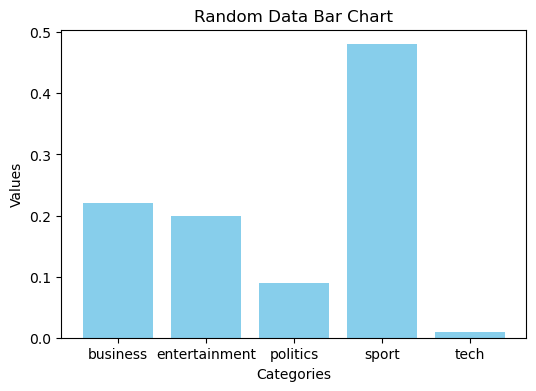

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(loaded_clf.classes_, preds[0], color='skyblue')
plt.title('Random Data Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

### Sentiment Analysis

In [ ]:
df = pd.read_csv('../../datasets/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)

In [ ]:
df.head()

Distribution of Scores

In [ ]:
plt.figure(figsize=(4,3))

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars')
ax.set_xlabel('Review Stars')
plt.show()

Lets look at an example text

In [ ]:
example = df['Text'][50]
print(example)

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

### Sentiment Analysis with NLTK Vader

NLTK Vader is a simple rule based sentiment analysis model. More information can be found at:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [ ]:
nltk.download('vader_lexicon')

In [126]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

In [ ]:
sia.polarity_scores('I am so happy to see that everybody thinks this is a bad movie')

In [ ]:
example

In [ ]:
sia.polarity_scores(example)

In [132]:
df_small = df.sample(n=50000)

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_small.iterrows(), total=len(df_small)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [134]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_small, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

In [ ]:
print(np.max(vaders.compound))
print(np.min(vaders.compound))

In [ ]:
print(np.max(vaders.Score))
print(np.min(vaders.Score))

In [ ]:
def scale_score(x):
    return 3 + 2 * x

scaled_scores = [scale_score(x) for x in vaders.compound]
print(scaled_scores)


In [ ]:
print("MAE:", mean_absolute_error(vaders.Score, scaled_scores))
print("MSE:", mean_squared_error(vaders.Score, scaled_scores))

For comparison, following shows the performance of random guess

In [ ]:
random_scores = np.random.randint(1, 6, size=len(vaders))
print("MAE random:", mean_absolute_error(vaders.Score,random_scores))
print("MSE random:", mean_squared_error(vaders.Score, random_scores))

### Sentiment Analysis with machine learning

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X = tfidf_vectorizer.fit_transform(df_small['Text'])
y = df_small['Score'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model1 = LGBMClassifier()
model2 = LGBMRegressor()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predict and evaluate the classifier
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)

In [ ]:
print("MAE classifier:", mean_absolute_error(y_test, predictions1))
print("MSE classifier:", mean_squared_error(y_test, predictions1))
print("MAE regressor:", mean_absolute_error(y_test, predictions2))
print("MSE regressor:", mean_squared_error(y_test, predictions2))

Results are better than the rule based sentiment analysis. Note that, we did not use the entire dataset, more data will improve the performance of the ML classifiers. Aslo note that this is a simple TFIDF+ML implementation, there is room for improvement. Another thing to note is that modeling the problem as a classification problem (as opposed to a regression problem) gave better results in terms of MAE but worse results in terms of MSE. This is reasonable since for the classifier predicting a wrong class amounts to the same error regardless of the actaul value, so the classifier optimizes for predicting the correct class rather than predicting a class which is numerically closer. On the other hand the regressor tries to minimize the distance between the actual value and the prediction. Hence we get lower MAE but higher MSE using a classifier.